In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

In [2]:
languages = ["tr", "sw", "ta", "id", "zh"]

setups = ["zerocov", "fullcov"]

seeds = ["seed1", "seed2", "seed3"]

In [3]:
path_to_repo = "/mnt/nas_home/mrgj4/final_repo/thesis-code/"

In [4]:
lang_results = {}
for lang in languages:

    setup_results = {}

    for setup in setups:
        seed_results = {}
        for seed in seeds:
            with open(path_to_repo + "experiment_2/{l}/{s}/{setup}/test/pytorch_model_best.bin-/eval.txt".format(l = lang, setup = setup, s = seed)) as f:
                lines = f.readlines()
                score = float(lines[0].split(" ")[-2])
            seed_results[seed] = score 
        setup_results[setup] = seed_results  
    
    lang_results[lang] = setup_results

In [5]:
def get_avg_std(lang, lang_results):
    results = lang_results[lang]

    means = []
    stds = []

    for setup in setups:
        setup_results = np.asarray([results[setup]["seed1"], results[setup]["seed2"], results[setup]["seed3"]])
        means.append(setup_results.mean())
        stds.append(setup_results.std())
    
    return means, stds

In [6]:
def plot_results(lang, means, stds):
    
    plt.rcParams['figure.dpi'] = 200
    plt.rcParams["figure.figsize"] = (10, 8)

    # width of the bars
    barWidth = 0.5
    
    # Choose the height of the blue bars
    bars1 = means
    
    # Choose the height of the error bars (bars1)
    yer1 = [2 * stds[0], 2 * stds[1]]
    
    # The x position of bars
    r1 = np.arange(len(bars1))
    
    # Create blue bars
    plt.bar(r1, bars1, width = barWidth, color = 'lightcyan', edgecolor = 'black', yerr=yer1, capsize=7)

    plt.title("{l}".format(l = lang.upper()))
    plt.ylabel('Accuracy (%)')
    plt.ylim([50, 60])
    plt.xticks([r for r in range(len(bars1))], ['zero', 'full'])
    plt.xlabel("Coverage")
    # Show graphic
    plt.show()

### SW

In [7]:
means_sw, stds_sw = get_avg_std("sw", lang_results)

In [8]:
zerocov_sw_mean, fullcov_sw_mean = means_sw
zerocov_sw_std, fullcov_sw_std = stds_sw

In [10]:
print(zerocov_sw_mean)
print(fullcov_sw_mean)

54.39233333333333
54.843333333333334


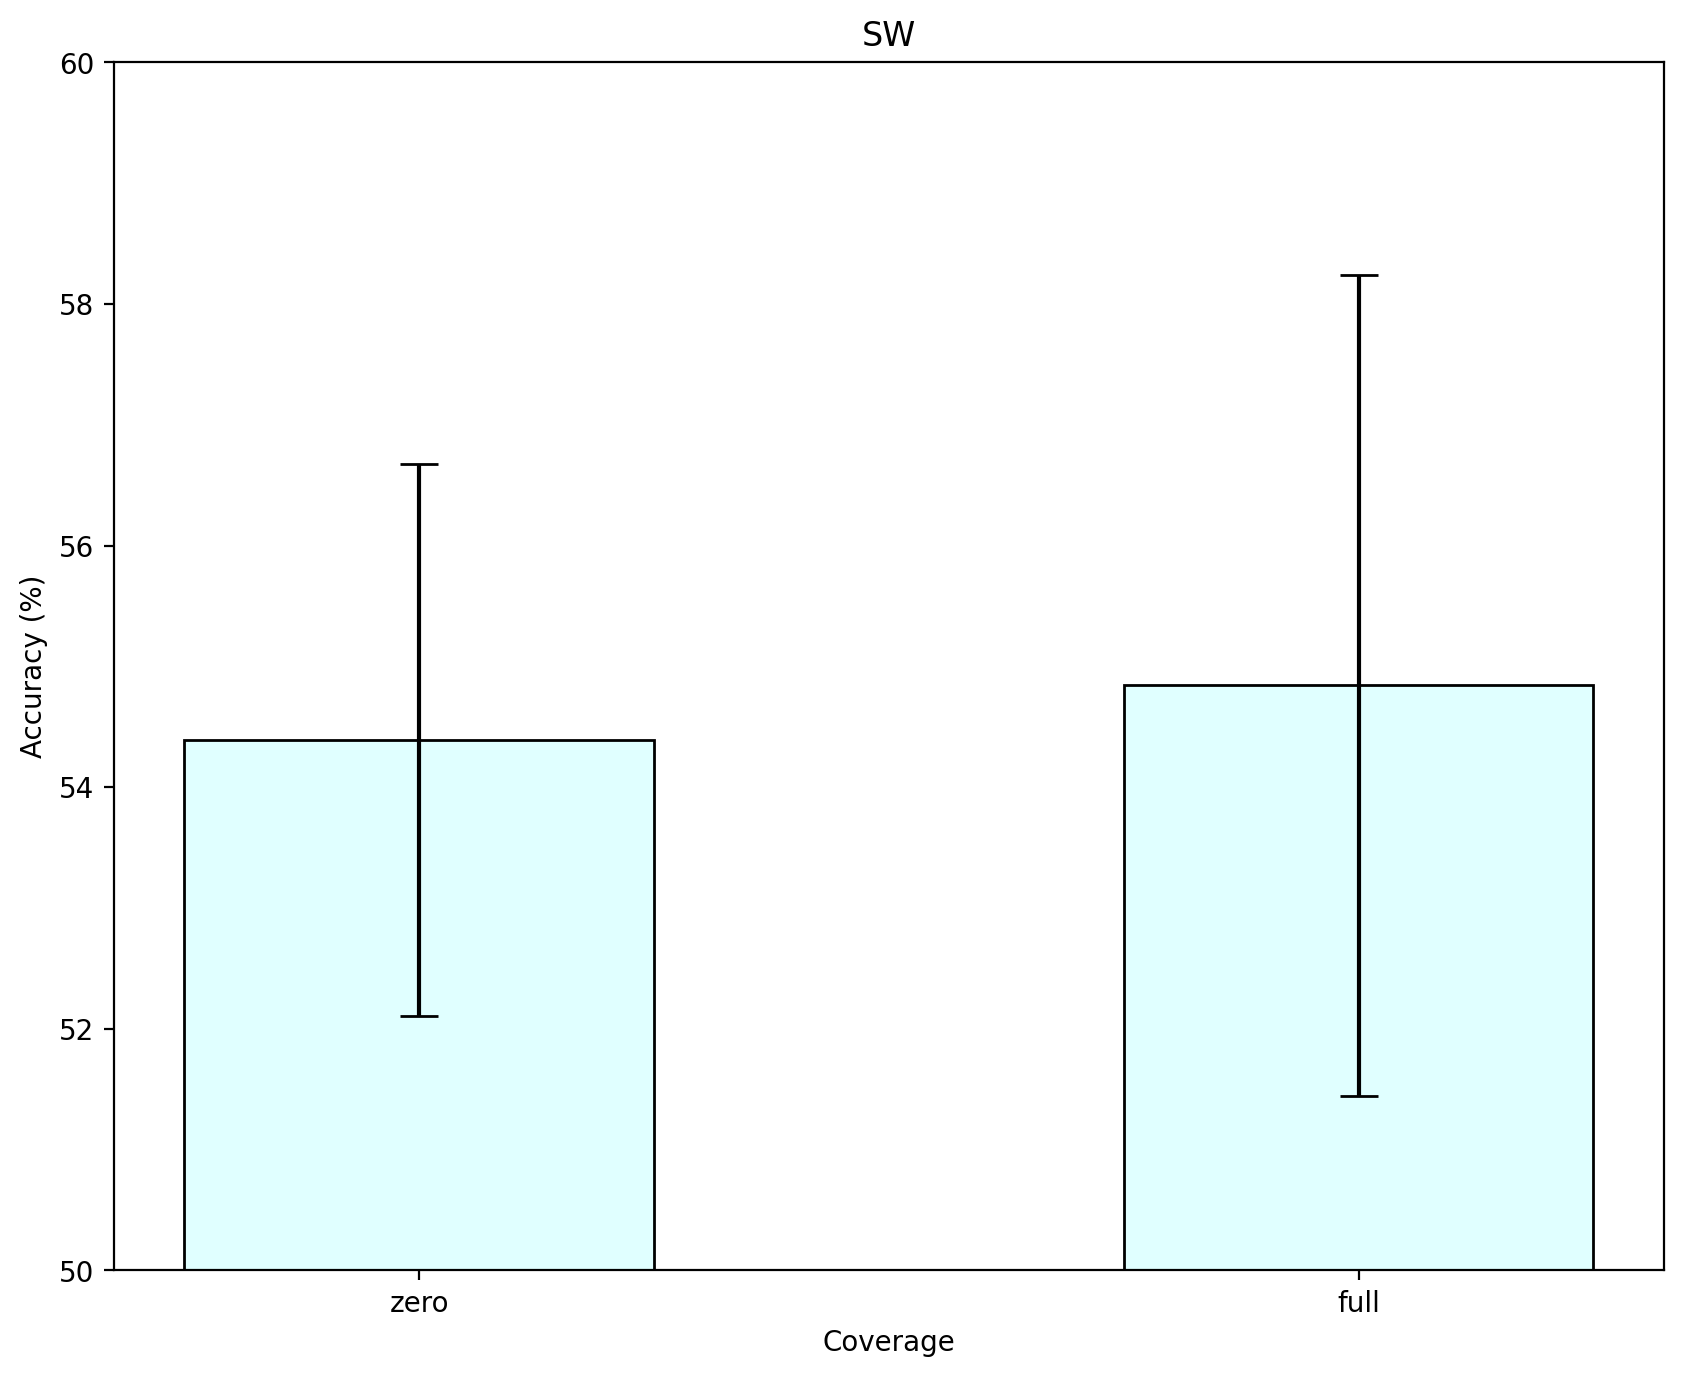

In [11]:
plot_results("sw", [zerocov_sw_mean, fullcov_sw_mean], [zerocov_sw_std,fullcov_sw_std])

### TA

In [12]:
means_ta, stds_ta = get_avg_std("ta", lang_results)

In [13]:
zerocov_ta_mean, fullcov_ta_mean = means_ta
zerocov_ta_std, fullcov_ta_std = stds_ta

In [14]:
print(zerocov_ta_mean)
print(fullcov_ta_mean)

55.502
55.39433333333333


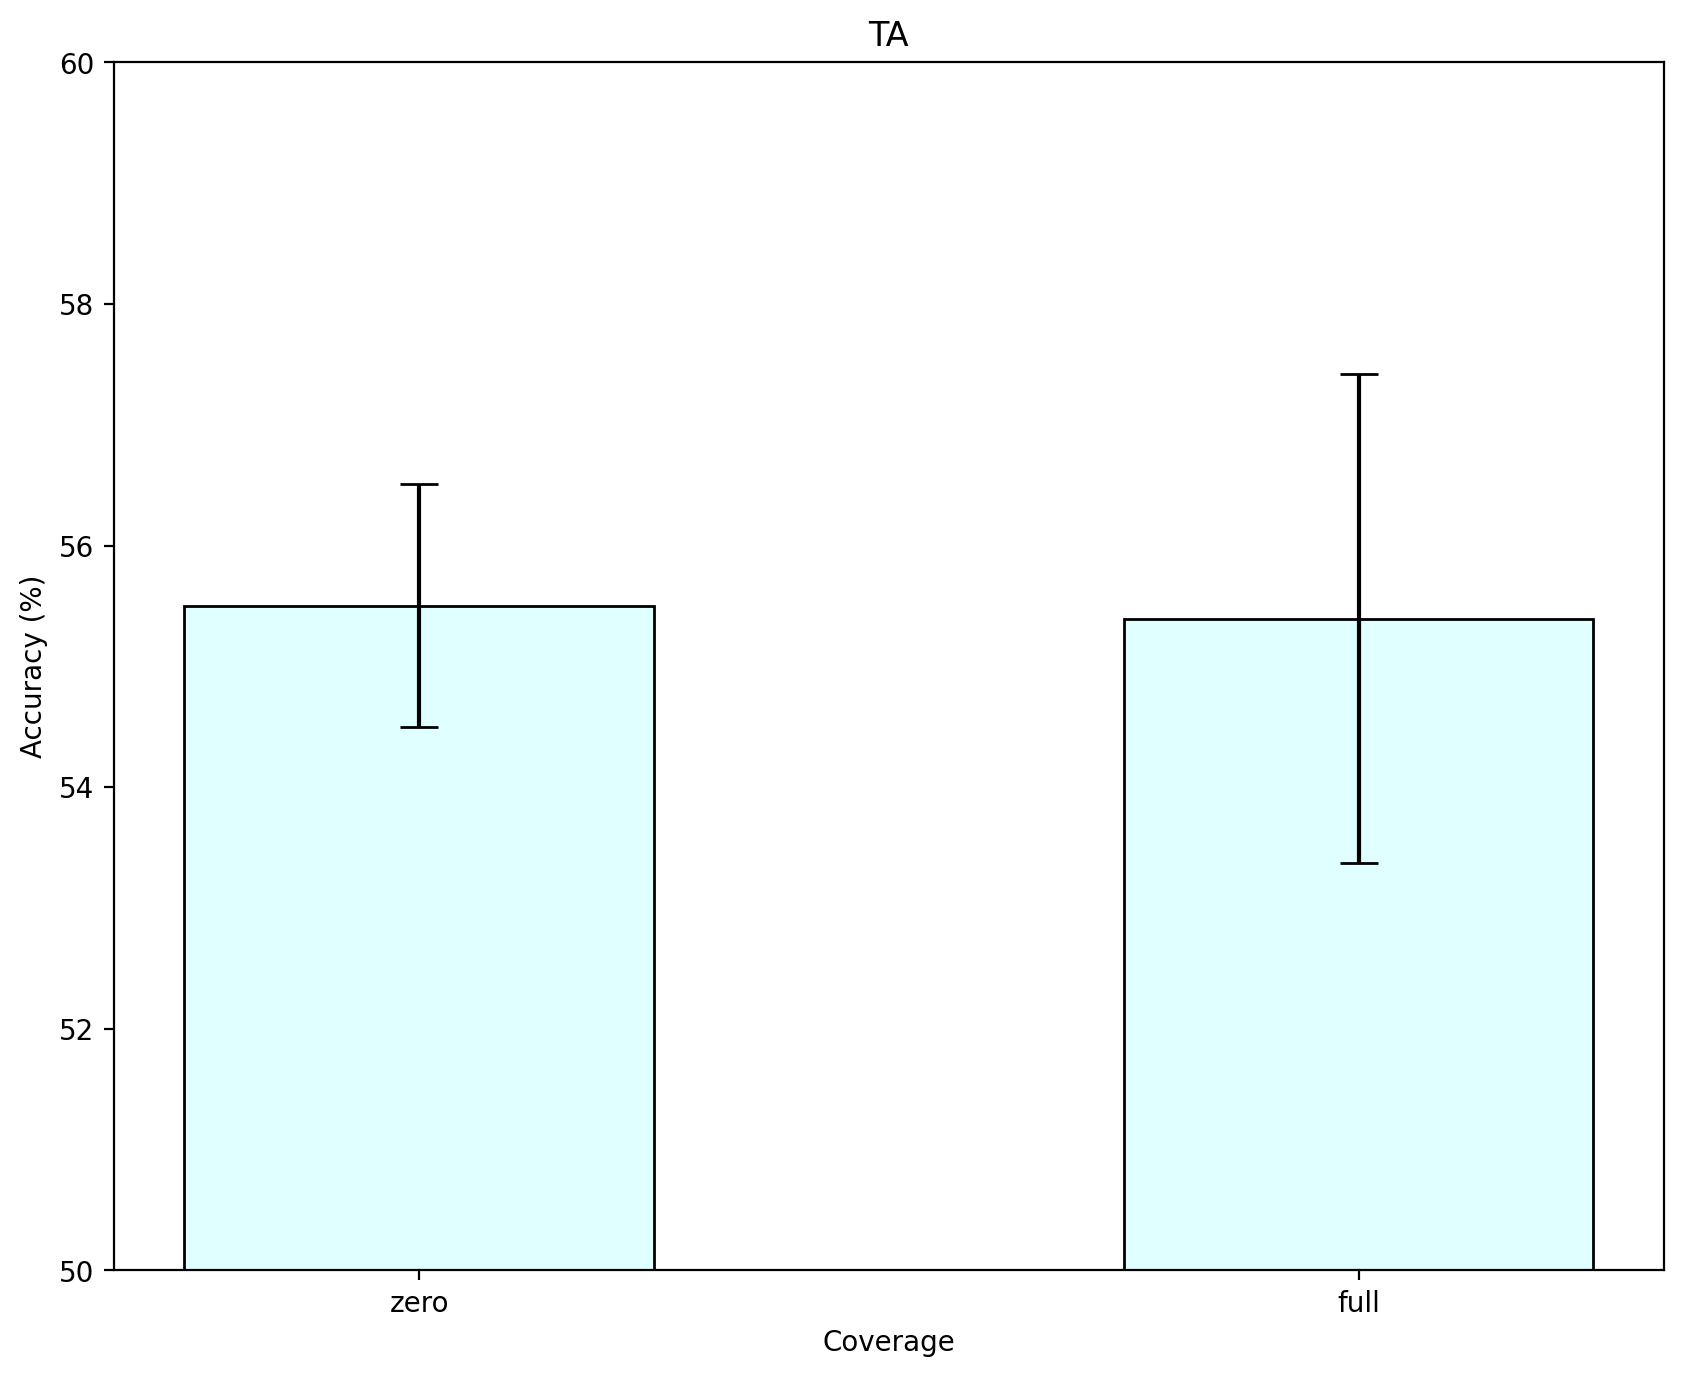

In [55]:
plot_results("ta", [zerocov_ta_mean, fullcov_ta_mean], [zerocov_ta_std,fullcov_ta_std])

### TR

In [56]:
means_tr, stds_tr = get_avg_std("tr", lang_results)

In [57]:
zerocov_tr_mean, fullcov_tr_mean = means_tr
zerocov_tr_std, fullcov_tr_std = stds_tr

In [72]:
print(zerocov_tr_mean)
print(fullcov_tr_mean)

57.23166666666666
56.214666666666666


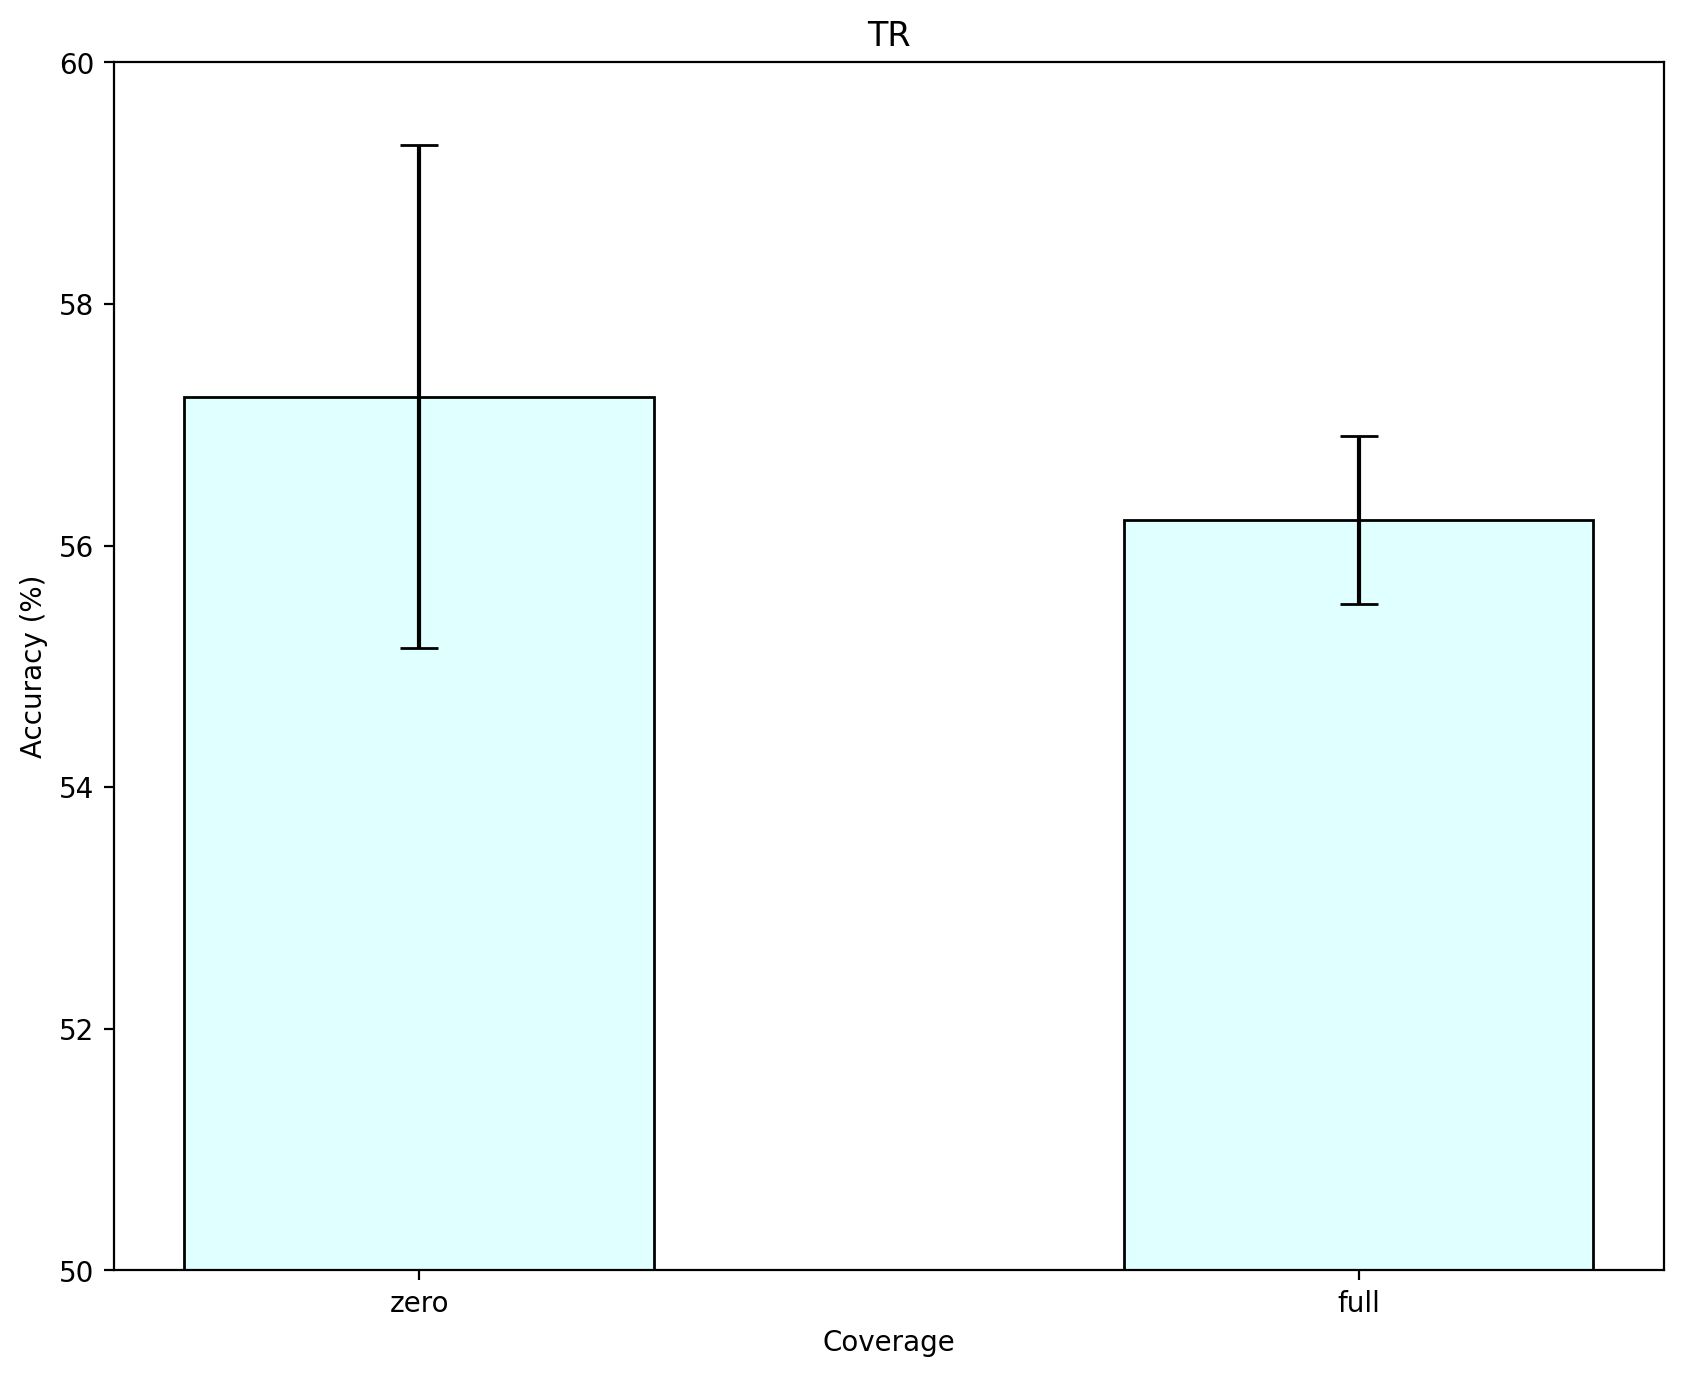

In [58]:
plot_results("tr", [zerocov_tr_mean, fullcov_tr_mean], [zerocov_tr_std,fullcov_tr_std])

### ID

In [59]:
means_id, stds_id = get_avg_std("id", lang_results)

In [60]:
zerocov_id_mean, fullcov_id_mean = means_id
zerocov_id_std, fullcov_id_std = stds_id

In [73]:
print(zerocov_id_mean)
print(fullcov_id_mean)

55.67366666666666
55.23066666666667


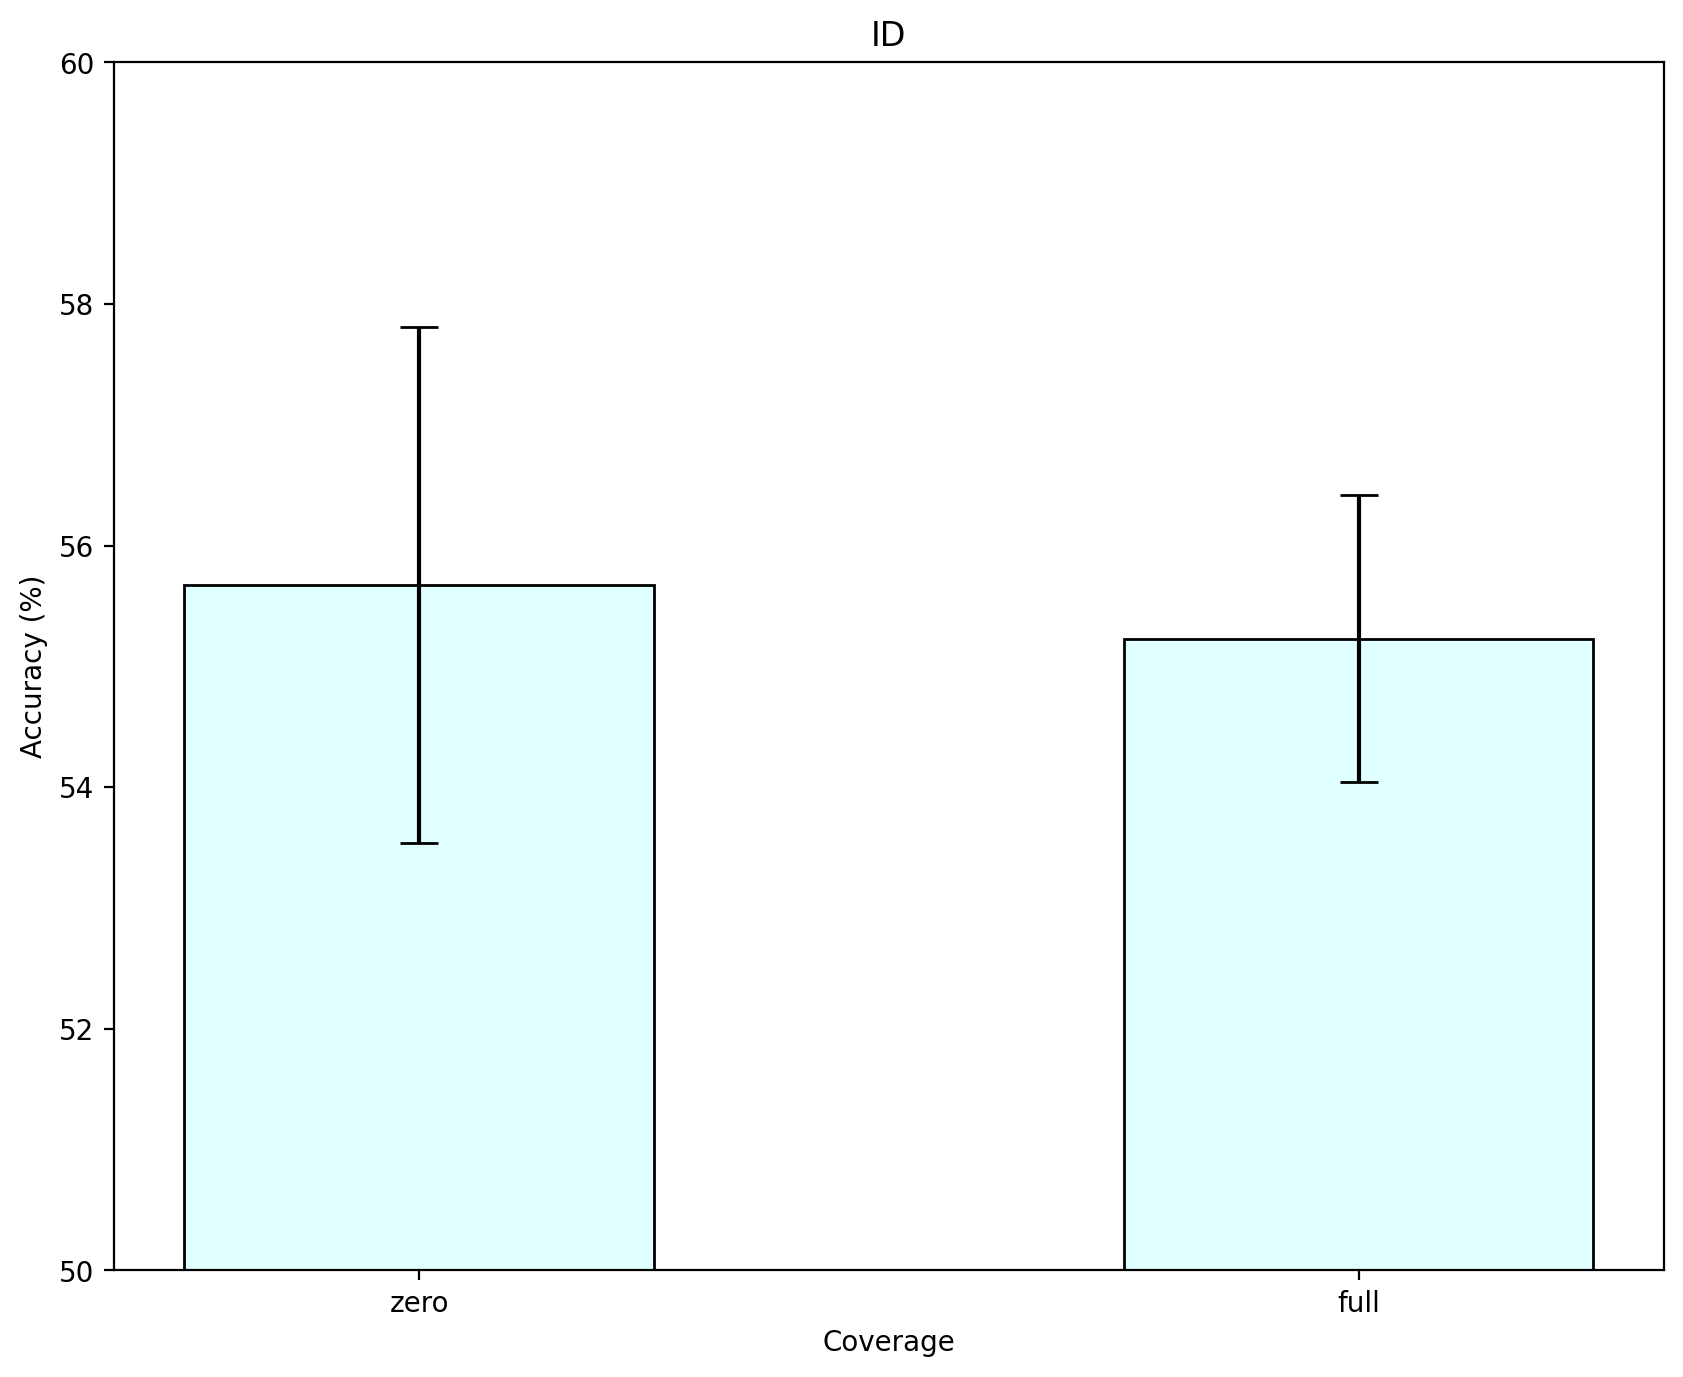

In [61]:
plot_results("id", [zerocov_id_mean, fullcov_id_mean], [zerocov_id_std,fullcov_id_std])

### ZH

In [62]:
means_zh, stds_zh = get_avg_std("zh", lang_results)

In [63]:
zerocov_zh_mean, fullcov_zh_mean = means_zh
zerocov_zh_std, fullcov_zh_std = stds_zh

In [74]:
print(zerocov_zh_mean)
print(fullcov_zh_mean)

56.159333333333336
55.46766666666667


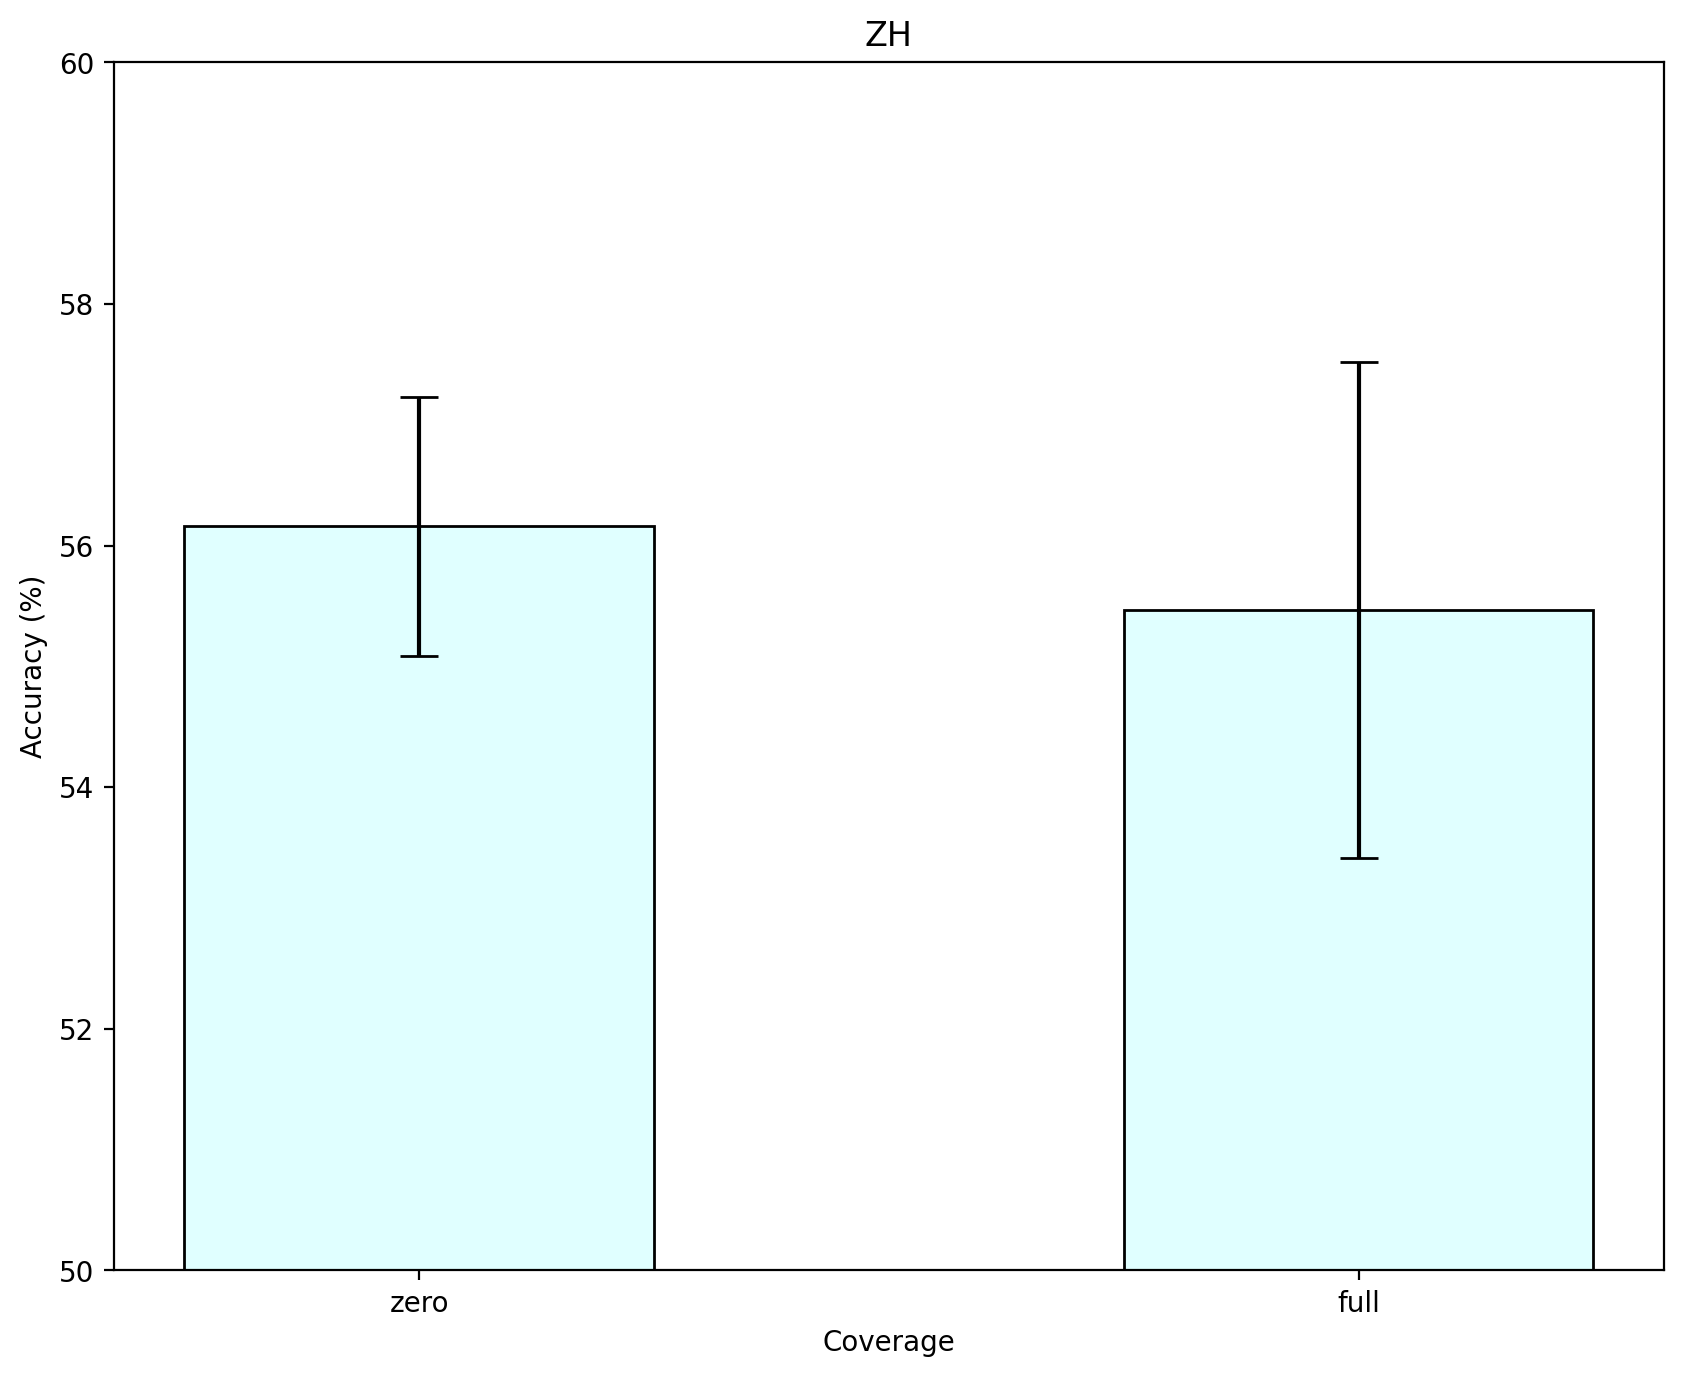

In [64]:
plot_results("zh", [zerocov_zh_mean, fullcov_zh_mean], [zerocov_zh_std,fullcov_zh_std])

### ALL

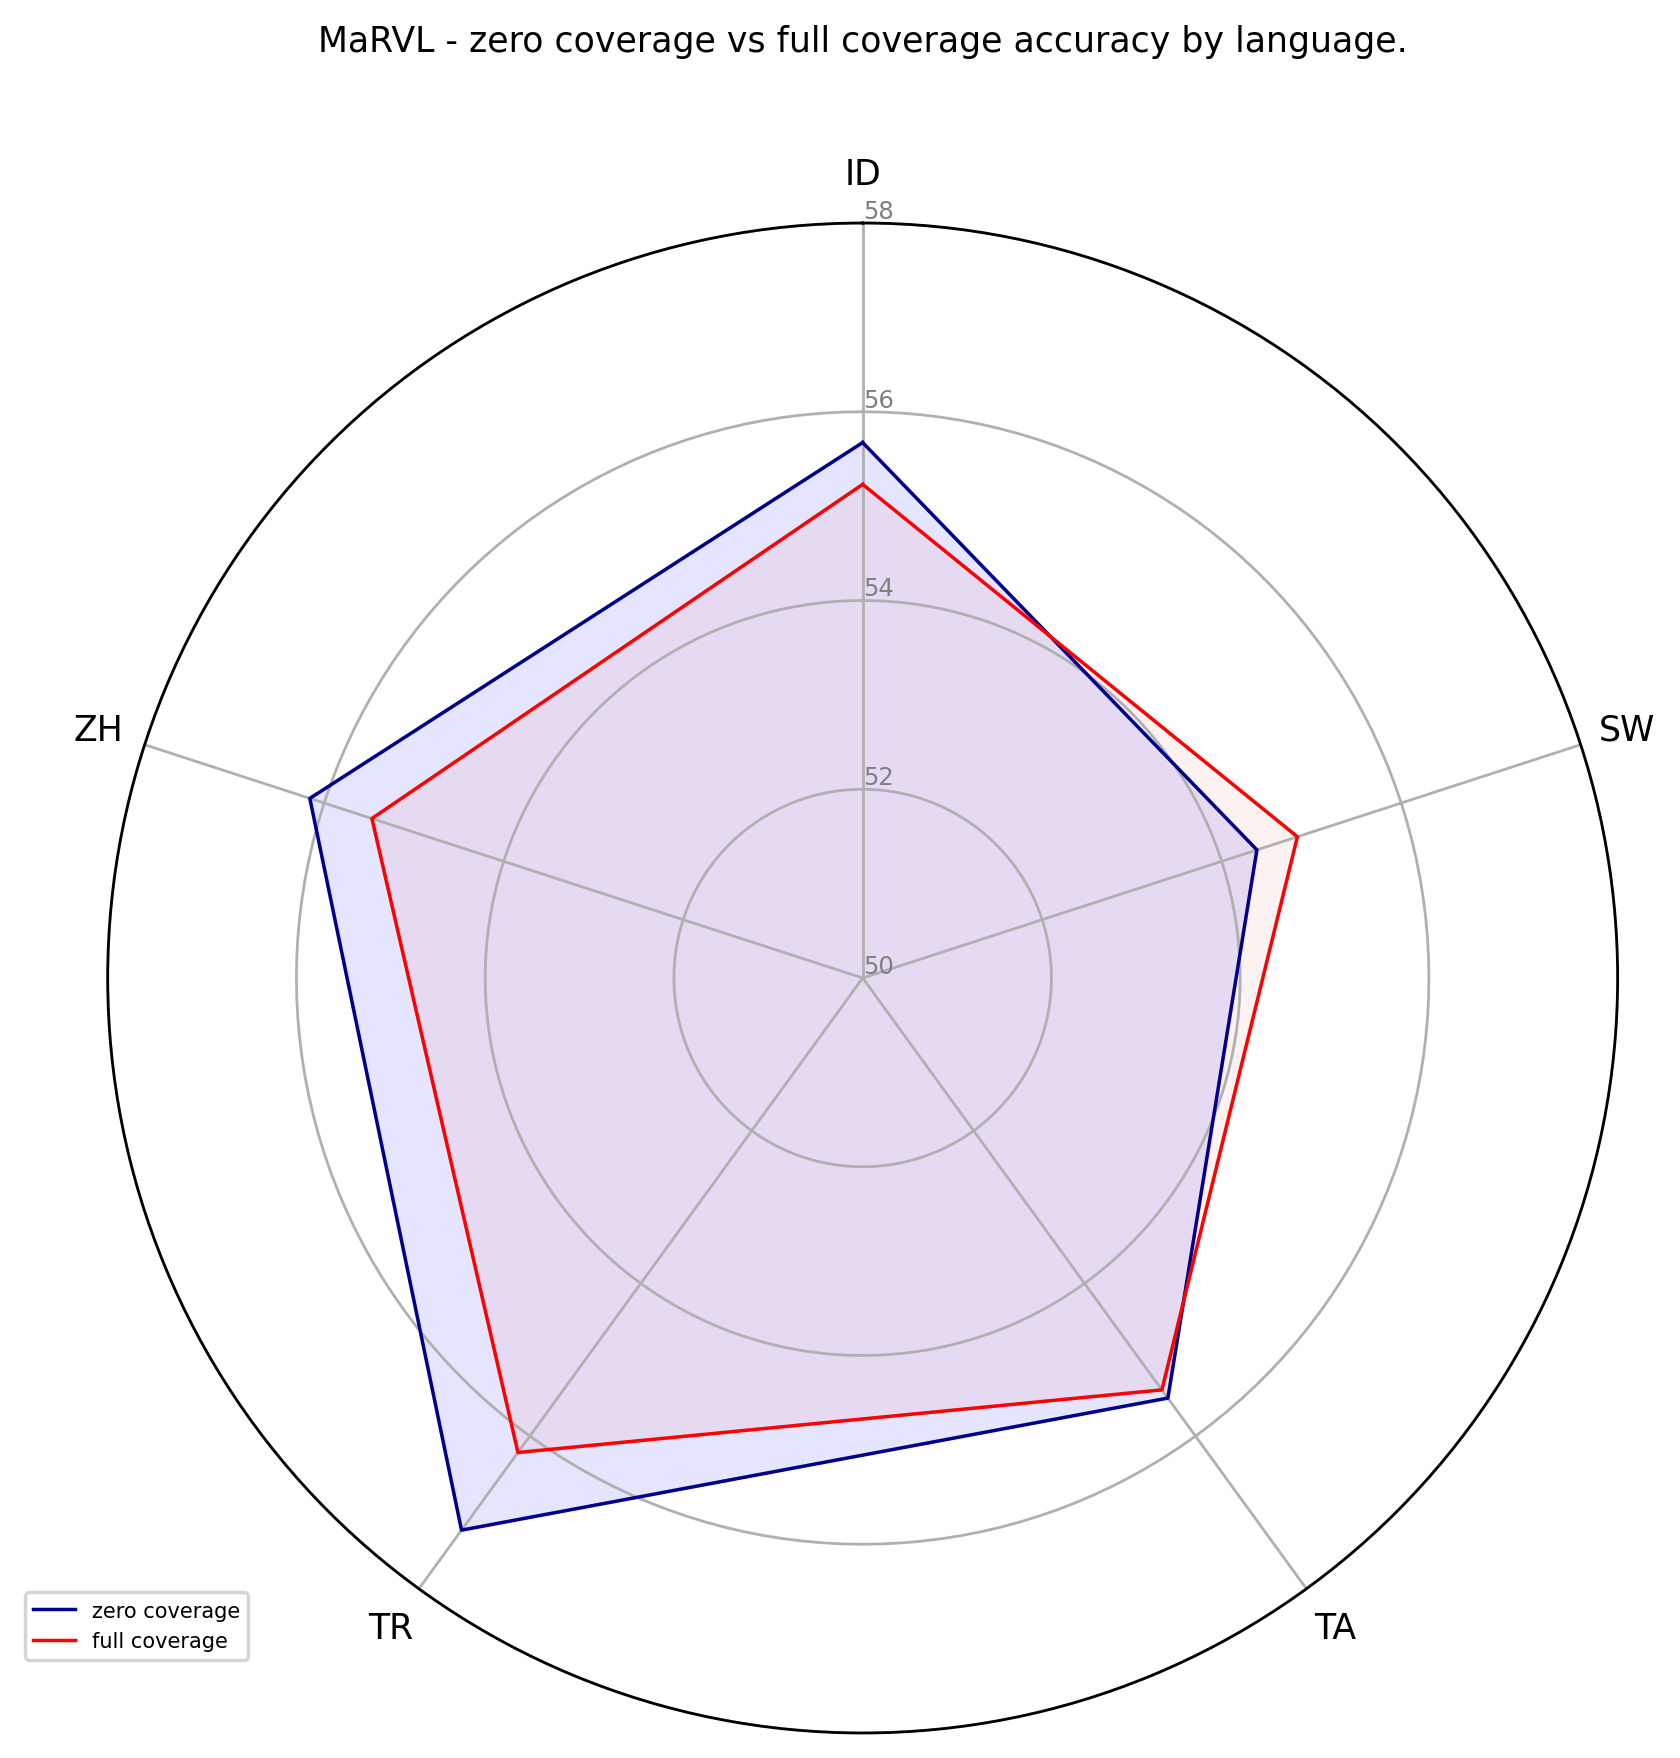

In [69]:
plt.rcParams['figure.dpi'] = 250

# Set data
df = pd.DataFrame({
'group': ['zero coverage','full coverage',],
'ID': [zerocov_id_mean, fullcov_id_mean],
'SW': [zerocov_sw_mean, fullcov_sw_mean],
'TA': [zerocov_ta_mean, fullcov_ta_mean],
'TR': [zerocov_tr_mean, fullcov_tr_mean],
'ZH': [zerocov_zh_mean, fullcov_zh_mean]
})
 
# ------- PART 1: Create background
 
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([50,52,54,56,58], ["50","52","54", "56", "58"], color="grey", size=7)
plt.ylim(50,58)
 

# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 

# Ind1
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values = np.asarray(values)
ax.plot(angles, values, linewidth=1, linestyle='solid', color="darkblue", label="zero coverage")
ax.fill(angles, values, color="blue", alpha=0.1)
 
# Ind2
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', color="red", label="full coverage")
ax.fill(angles, values, color = "lightcoral", alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1), prop={'size': 6})
plt.title("MaRVL - zero coverage vs full coverage accuracy by language.", y = 1.1, fontsize=10)

# Show the graph
plt.show()